## Final Project Submission

* Student name: Ismael Araujo
* Student pace: full time
* Scheduled project review date/time: October 2, 2020
* Instructor name: Fangfang
* Blog post URL:


# Overview
- The purpose of this project is identify the type of movies are currently doing the best in the box office and draw recommendations for a movie studio based on relevant data
- The approach was use multiple datasets to analyse group of genres as well as individual genres, budget, box office, and ROI.

# Business Problem

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. 

<strong>Your team is charged with exploring what type of films are currently doing the best at the box office</strong>. You must then translate those findings into actionable <strong>insights</strong> that the head of Microsoft's new movie studio can use to help <strong>decide what type of films to create</strong>.

# Questions:

1. Is there any connection between the top 20 most profitable movies of all times?

2. Does higher budget reflect in higher profits?

3. What are the top 10 genres with the most movies launched since 1990?

4. What groups of genres bring the highest box office revenue and ROI?

5. What genres bring the highest box office revenue and ROI?

# Sections Summary:

1. Importing Libraries and Datasets
2. Inicial Data Wrangling
3. Cleaning the Data
4. Exploring the Data
5. Genres With The Highest Release Of Movies
6. Correlation Between a Higher Budget and Higher Profits
7. Other Correlations
8. Most Profitable Genres Group
9. Most Profitable Individual Genres
10. Final Takeaways and Recomendations

# 1. Importing Libraries and Datasets

### 1.1 Import libraries

In [1]:
# Install xlrd to use the read_excel method
!pip install xlrd

# Import libraries
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
# This will force Pandas to show all the DataFrame's rows
pd.set_option('display.max_columns', None)

### 1.2 Import files needed to investigate the data

In [2]:
# Import files that I'll need to investigate the data
df_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')
df_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')
df_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip')
df_imdb = pd.read_excel('zippedData/movies_metadata.xlsx')
df_movies = pd.read_excel('zippedData/IMDb-movies.xlsx')

### Findings:

- One of the data sets is taking a few seconds to load. I'll filter out the irrelevant data to improve the speed.

### Next Steps:

- Start investigating the DataFrames.

# 2. Inicial Data Wrangling

- Open the DataFrames and understand their dimensions and what type of data is available

Note: The cells in this section DOES NOT affect other sections of the this notebook.

### 2.1 imdb.title.basics.csv imported as df_basics

In [3]:
# Start investigating the data sets using .head(1) to see only the first row of the DataFrame
df_basics.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [4]:
# Using .shape to see understand the DataFrame's dimmensions
df_basics.shape

(146144, 6)

### 2.2 imdb.title.ratings.csv  imported as df_ratings

In [5]:
df_ratings.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


In [6]:
df_ratings.shape

(73856, 3)

### 2.3 imdb.title.ratings.csv.gz imported as df_akas

In [7]:
df_akas.head(1)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [8]:
df_akas.shape

(331703, 8)

### 2.4 movies_metadata.xlsx imported as df_imdb

In [9]:
df_imdb.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,190269,tt0020217,en,New York Nights,Show girl Jill Deverne is married to song writ...,0.657513,/8Af9KCVMLXY9baR5CfilAms9OT2.jpg,"[{'name': 'Joseph M. Schenck Production', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2029-12-28,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,New York Nights,False,0.0,0


In [10]:
df_imdb.shape

(30379, 24)

### 2.5 IMDb-movies.xlsx imported as df_movies

In [11]:
df_movies.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0


In [12]:
df_movies.shape

(85854, 22)

### Findings:

- The data I need is spread in multiple DataFrames
- The IMDb data sets have an ID number, which will help me to merge my the DataFrames
- There are multiple columns that will not be needed and multiple rows with empty values
- The df_movies and df_imdb DataFrames is taking a few seconds to load

### Next Steps:

- Since Microsoft is an American company, only movies made by American studios will be used.

# 3. Cleaning the Data

- Rename columns
- Set new indexes
- Merge DataFrames
- Remove data that I will not need

### 3.1 Rename Columns

- Create a pattern between the DataFrames that contains a columns with an IMDb ID number and have name them imdb_id

In [13]:
# Use .rename to rename columns
df_basics.rename(columns={'tconst':'imdb_id'}, inplace=True)
df_akas.rename(columns={'title_id':'imdb_id'}, inplace=True)
df_ratings.rename(columns={'tconst':'imdb_id'}, inplace=True)
df_movies.rename(columns={'imdb_title_id':'imdb_id'}, inplace=True)

### 3.2 Set and match indexes
- Set all the imdb_id columns as index. It will help when these DataFrames are merged together

In [14]:
# Use .set_index to set imdb_id as the new index
df_basics.set_index('imdb_id', inplace=True)
df_ratings.set_index('imdb_id', inplace=True)
df_akas.set_index('imdb_id', inplace=True)
df_imdb.set_index('imdb_id', inplace=True)
df_movies.set_index('imdb_id', inplace=True)

### 3.3 Join DataFrames

In [15]:
# Joining the df_basics and df_akas dataframes. 'df_ba' stands for DataFrame Basics & Akas
df_ba = df_basics.join(df_akas)
df_ba.head(1)

,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
imdb_id,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,Sangharsh,IN,hi,NaN,alternative transliteration,0.0


In [16]:
# Joining the df_ba and df_ratings dataframes. 'bar' stands for DataFrame Basics, Akas & Ratings
df_bar = df_ba.join(df_ratings)
df_bar.head(1)

,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
imdb_id,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,Sangharsh,IN,hi,NaN,alternative transliteration,0.0,7.0,77.0


### 3.4 Drop all movies that weren't produced by studios in the US

Note: Since Microsoft is an American company and the US is the largest market for movies, I will work only with movies produced in the US.

In [17]:
# Using print(x.shape) to see the dimmensions of more than one DataFrame at once
print(df_bar.shape)
# Checking the size of the DataFrame if I filter all the rows that don't contain 'US' under region
print(df_bar[df_bar.region == 'US'].shape)

(355545, 14)
(51490, 14)


In [18]:
# Filtering out all rows that don't contain 'US' under 'region'
df_bar = df_bar[df_bar.region == 'US']
# Checking the shape. It matches to what was predicted in the cell above
df_bar.shape

(51490, 14)

In [19]:
print(df_bar.shape)
print(df_movies.shape)
# Checking the size of the DataFrame if I filter all the rows that don't contain 'USA' under country
print(df_movies[df_movies.country == 'USA'].shape)

(51490, 14)
(85854, 21)
(28510, 21)


In [20]:
# Filtering out all rows that don't contain 'US' under 'region'
df_movies = df_movies[df_movies.country == 'USA']
df_movies.shape

(28510, 21)

In [21]:
# Joining df_movies and df_bar and using rsuffic to avoid conflicts between columns with the same name
df_mbar = df_movies.join(df_bar,rsuffix='_bar')

In [22]:
# Checking if it worked
df_mbar.head(1)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,primary_title,original_title_bar,start_year,runtime_minutes,genres,ordering,title_bar,region,language_bar,types,attributes,is_original_title,averagerating,numvotes
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Checking the size of the DataFrame
df_mbar.shape

(30303, 35)

Note: the df_imdb has multiple columns with the same name as df_bar. Thus, I create another dataframe with the values that will be needed before merging it with my df_bar dataframe.

In [24]:
# Create new dataframe with the columns that are relevant. df_br stands for DataFrame Budget & Revenue
df_br = df_imdb.filter(['imdb_id','budget','revenue'], axis=1)
df_br.head(1)

,budget,revenue
imdb_id,,
tt0020217,0,0


In [25]:
# This DataFrame will be the main one. Using rsuffix to avoid conflict between columns with the same name
df = df_mbar.join(df_br,rsuffix='_br')
df.head(1)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,primary_title,original_title_bar,start_year,runtime_minutes,genres,ordering,title_bar,region,language_bar,types,attributes,is_original_title,averagerating,numvotes,budget_br,revenue
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.5 Add data to NaN values 

The objective is to use fillna to add values to rows with NaN values

In [26]:
# Checking null values in the DataFrame
df.isna().sum()

title                        1
original_title               1
year                         0
date_published               0
genre                        0
duration                     0
country                      0
language                   362
director                    34
writer                     208
production_company        1200
actors                      26
description                 76
avg_vote                     0
votes                        0
budget                   18822
usa_gross_income         21951
worlwide_gross_income    21714
metascore                22777
reviews_from_users         324
reviews_from_critics      1966
primary_title            21114
original_title_bar       21114
start_year               21114
runtime_minutes          21356
genres                   21114
ordering                 21114
title_bar                21114
region                   21114
language_bar             30080
types                    28299
attributes               29639
is_origi

In [27]:
# Using .fillna() to replace null values with values from another columns
df.budget.fillna(df.budget_br,inplace=True)
df.worlwide_gross_income.fillna(df.revenue,inplace=True)
df.budget_br.fillna(df.budget,inplace=True)
df.revenue.fillna(df.worlwide_gross_income,inplace=True)
df.genres.fillna(df.genre,inplace=True)
df.usa_gross_income .fillna(df.worlwide_gross_income,inplace=True)

In [28]:
# Checking if fillna() worked
df.isna().sum()

title                        1
original_title               1
year                         0
date_published               0
genre                        0
duration                     0
country                      0
language                   362
director                    34
writer                     208
production_company        1200
actors                      26
description                 76
avg_vote                     0
votes                        0
budget                   15199
usa_gross_income         18079
worlwide_gross_income    18693
metascore                22777
reviews_from_users         324
reviews_from_critics      1966
primary_title            21114
original_title_bar       21114
start_year               21114
runtime_minutes          21356
genres                       0
ordering                 21114
title_bar                21114
region                   21114
language_bar             30080
types                    28299
attributes               29639
is_origi

Great! Now we have only movies produced by American studios available for analysis. 

### 3.6 Drop columns

Note: I decided to drop the columns 'primary_title' and 'original_title' because their meanings sound ambiguos. The column 'title' is more straight forward.

In [29]:
# Checking what columns I have
df.columns

Index(['title', 'original_title', 'year', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'primary_title',
       'original_title_bar', 'start_year', 'runtime_minutes', 'genres',
       'ordering', 'title_bar', 'region', 'language_bar', 'types',
       'attributes', 'is_original_title', 'averagerating', 'numvotes',
       'budget_br', 'revenue'],
      dtype='object')

In [30]:
# Dropping unnecessary data
df.drop(columns=['title','director','writer','actors','description',\
                 'primary_title','original_title_bar','start_year','language','ordering',\
                 'title_bar','region','language_bar','types','attributes','is_original_title',\
                 'budget_br','revenue','runtime_minutes','numvotes','votes', 'reviews_from_users',\
                 'reviews_from_critics','averagerating','date_published'
                 
                ], inplace=True)

In [31]:
# Checking if it worked
df.head(1)

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres
imdb_id,,,,,,,,,,,,
tt0000009,Miss Jerry,1894,Romance,45,USA,Alexander Black Photoplays,5.9,NaN,NaN,NaN,NaN,Romance


In [32]:
# Checking the new DataFrame shape
df.shape

(30307, 12)

In [33]:
# Drop duplicated indexes
df = df[~df.index.duplicated(keep='last')]

In [34]:
# Checking new shape of the DataFrame
df.shape

(28510, 12)

# 4. Exploring the Data
- New movies throughout the year

### 4.1 First visualization 
- Use data visualization tools to have a better understanding of the datasets and if there are outliers that could break the analysis.



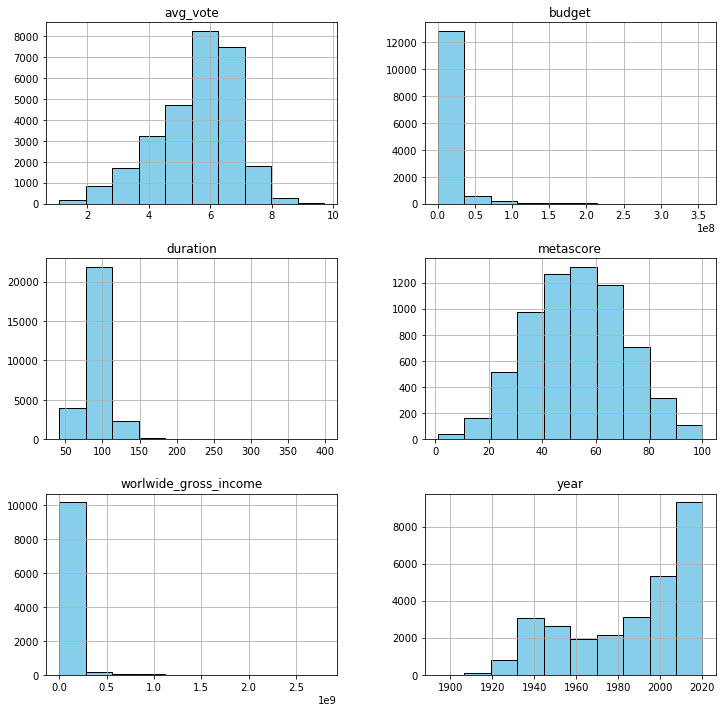

In [35]:
# Using a DataFrame histogram plot to better visualize the dimentions of the values in the DataFrame
df.hist(color='skyblue',edgecolor='black',figsize= (12,12));

In [36]:
# Checking the types of data
df.dtypes

original_title            object
year                       int64
genre                     object
duration                   int64
country                   object
production_company        object
avg_vote                 float64
budget                   float64
usa_gross_income          object
worlwide_gross_income    float64
metascore                float64
genres                    object
dtype: object

### 4.2 Use only movies launched between 1990 and 2020

In the 1990s, there was a <a href='https://theface.com/culture/do-the-right-thing-to-the-matrix-how-the-nineties-changed-cinema-forever'>revolution in the movies industry that changed the sector forever</a>. With new techlogies, we can create movies in CGI and many other new technologies. It was a new era to the movies. Thus, it's safe to say that we will have a scenario closer to the actual scenerio if we use movies produced between 1990 and 2020.

In [37]:
# Checking the timeframe of my DataFrame
print(df.year.min())
print(df.year.max())

1894
2020


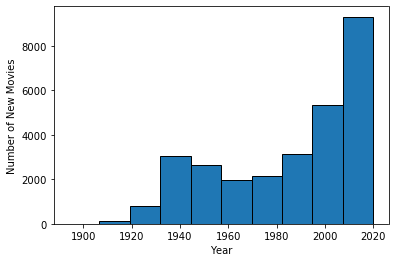

In [38]:
# Creating a histogram with the start_year columns
x = df.year
plt.hist(x, bins=10,edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of New Movies')
plt.show()

In [39]:
# Filtering my DataFrame to only have movies launched between 1990 and 2020
df = df[df.year >= 1990]
print(df.year.min())
print(df.year.max())

1990
2020


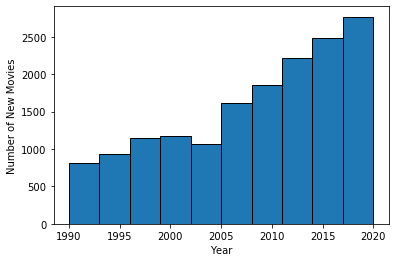

In [40]:
# Plotting a histogram to visualize when the movies were launched
x = df.year
plt.hist(x, bins=10,edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of New Movies')
plt.show()

# 5. Genres With The Highest Release Of Movies

### Objectives:
- Answer my fisrt question: What genres have the highest release of movies between 1990 and 2020
- Drop NaN values from the genres column
- Separate the genre columns that contains more that one genre

### 5.1 Drop NaN values under the genres column

In [41]:
# A look at the DataFrame
df.head(1)

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres
imdb_id,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy,Fantasy,Romance"


In [42]:
# Checking the shape of the DataFrame to make easier to compare how many  null values there are in each colums
df.shape

(16051, 12)

In [43]:
# Droping rows with missing values in the genres column
df.dropna(subset=['genres'], inplace=True)  

In [44]:
# Checking if there are null values under genres
df.isna().sum()

original_title               0
year                         0
genre                        0
duration                     0
country                      0
production_company         869
avg_vote                     0
budget                    6035
usa_gross_income          7565
worlwide_gross_income     7611
metascore                10847
genres                       0
dtype: int64

Now that the null values under the genres(last column) column is deleted, I noticed that there are movies with more than one genre. I'll separate them to three columns. I'll use these columns to create a dictionary which will show me how many movies were launched for each value.

I will keep the column genre (4th column) as it is for now. It will be used to further analysis.

### 5.2 Separate values under the genres columns into different columns

In [45]:
# Separanting the genres columns into three genres using the comma as a dividing point
df[['genre_1','genre_2','genre_3']] =  df.genre.str.split(',',expand=True,)
df.head(1)

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3
imdb_id,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance


In [46]:
# Counting null values in the new genres columns
print(df.genre_1.isna().sum())
print(df.genre_2.isna().sum())
print(df.genre_3.isna().sum())

0
4594
9752


Awesome. The genres are separated.

### 5.3 Create a dictionary that counts genres

In [47]:
# Using groupby to turn the new genres columns into a dictionary
genre_1 = dict(df.groupby(['genre_1']).size())
genre_2 = dict(df.groupby(['genre_2']).size())
genre_3 = dict(df.groupby(['genre_3']).size())

In [48]:
# Using Counter to sum the dictionary values together
genres_dict = dict(Counter(genre_1)+Counter(genre_2)+Counter(genre_3))
genres_dict

{'Action': 2527,
 'Adventure': 1208,
 'Animation': 330,
 'Biography': 348,
 'Comedy': 5681,
 'Crime': 2038,
 'Drama': 7641,
 'Family': 862,
 'Fantasy': 762,
 'History': 139,
 'Horror': 3285,
 'Music': 310,
 'Musical': 126,
 'Mystery': 1143,
 'Romance': 2277,
 'Sci-Fi': 1128,
 'Sport': 286,
 'Thriller': 3420,
 'War': 123,
 'Western': 171,
 'News': 1,
 'Reality-TV': 1}

### 5.4 Create a bar plot for the top genres

In [49]:
# Setting up x and y values using the dictionaries keys and values
x2 = genres_dict.keys()
y2 = genres_dict.values()

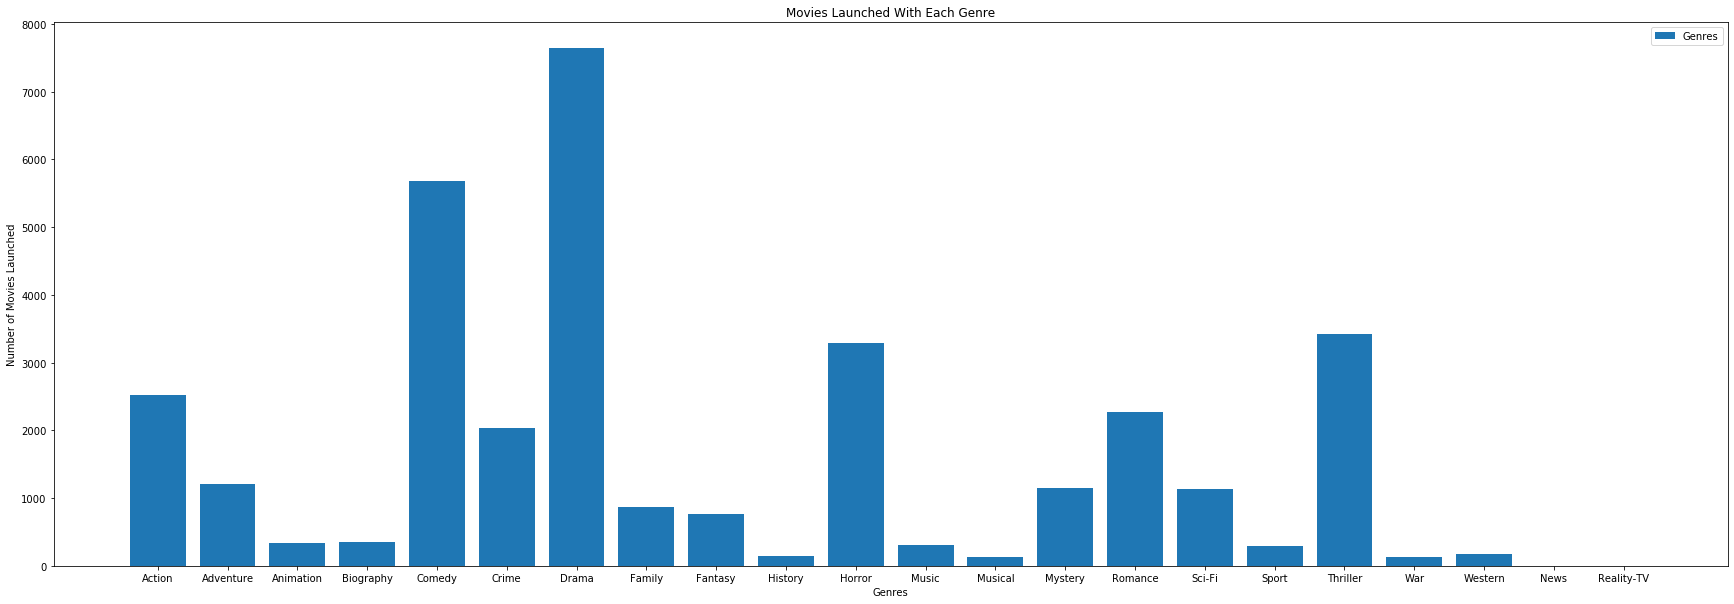

In [50]:
# Defining the figure size
plt.figure(figsize=(30,10))

# Using the bar() function to create a plot using the above values of x and y; and creating a label
plt.bar(x2,y2, label='Genres')

# Creating x and y labels
plt.xlabel('Genres')
plt.ylabel('Number of Movies Launched')

# Creating a title to the label
plt.title('Movies Launched With Each Genre')
plt.legend()

# Final plot
plt.show()

In [51]:
# Using Counter to check the largest values in my genres dictionary
k = Counter(genres_dict) 
  
# Finding 15 highest values using most_commom
genres_count = k.most_common(15)  

# Printing the top 15 most produced movies genres
print("The top 15 most produced movie genres and number of movies\nof each genre launched between 2010 and 2020:\n") 

# Using for loop to print the list in a more readable format
for x,y in genres_count: 
    print(x,'-',y) 

The top 15 most produced movie genres and number of movies
of each genre launched between 2010 and 2020:

Drama - 7641
Comedy - 5681
Thriller - 3420
Horror - 3285
Action - 2527
Romance - 2277
Crime - 2038
Adventure - 1208
Mystery - 1143
Sci-Fi - 1128
Family - 862
Fantasy - 762
Biography - 348
Animation - 330
Music - 310


Now, I will plot the top 10 genres with more movies launched.

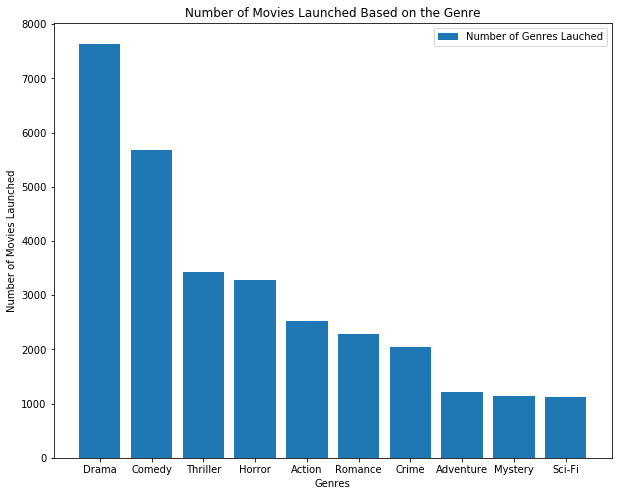

In [52]:
# Creating a variable using most_common and then converting it into a dictionary
top_10_genres = k.most_common(10)  
top_10_genres = dict(top_10_genres)

# Setting x and y up
x3 = top_10_genres.keys()
y3 = top_10_genres.values()

# Setting the figure size
plt.figure(figsize=(10,8))

# Using the bar() function to create a plot using the above values of x and y; and create labels
plt.bar(x3,y3, label='Number of Genres Lauched')
plt.xlabel('Genres')
plt.ylabel('Number of Movies Launched')

plt.title('Number of Movies Launched Based on the Genre')
plt.legend()

# Output the final plot
plt.show()

### Findings:

- The top 15 genres have the highest release of movies between 1990 and 2020 are Drama, Comedy, Horror, Thriller, Action, Biography, Adventure, Romance, Crime, History, Family, Mystery, Sci-Fi, and Music.



### Next Steps:

- Find out which are the most profitable genres

# 6. Correlation Between a Higher Budget and Higher Profits

Note: Accordly to <a href='https://theweek.com/articles/647394/when-buy-movie-ticket-where-does-that-money'>this article</a>, studios get approximately 60% of the box office in the US. Thus, I will remove 40% of the final profit.

In [53]:
# Checking the columns that I will use so that I decide with columns I will be using
df.columns

Index(['original_title', 'year', 'genre', 'duration', 'country',
       'production_company', 'avg_vote', 'budget', 'usa_gross_income',
       'worlwide_gross_income', 'metascore', 'genres', 'genre_1', 'genre_2',
       'genre_3'],
      dtype='object')

### 6.1 Check top movies with the highest budget

In [54]:
# First, I want to take a look of the top budget movies
df.nlargest(5, 'budget')

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3
imdb_id,,,,,,,,,,,,,,,
tt4154796,Avengers: Endgame,2019,"Action,Adventure,Drama",181,USA,Marvel Studios,8.4,356000000.0,858373000,2.797801e+09,78.0,"Action,Adventure,Sci-Fi",Action,Adventure,Drama
tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",149,USA,Marvel Studios,8.4,321000000.0,678815482,2.048360e+09,68.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,"Action,Adventure,Fantasy",152,USA,Walt Disney Pictures,7.0,317000000.0,620181382,1.332540e+09,84.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
tt0449088,Pirates of the Caribbean: At World's End,2007,"Action,Adventure,Fantasy",169,USA,Walt Disney Pictures,7.1,300000000.0,309420425,9.609965e+08,50.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
tt2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,"Action,Adventure,Fantasy",141,USA,Walt Disney Pictures,6.6,275000000.0,515202542,1.074144e+09,53.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy


In [55]:
# Creates a dictionary with the top 5 movies with the highest budget
df_top_budget = df.filter(['original_title','budget'], axis=1)
df_top_budget.set_index('original_title',inplace=True)
budget_dict = dict(df_top_budget.nlargest(10, 'budget'))
budget_dict

{'budget': original_title
 Avengers: Endgame                                356000000.0
 Avengers: Infinity War                           321000000.0
 Star Wars: Episode VIII - The Last Jedi          317000000.0
 Pirates of the Caribbean: At World's End         300000000.0
 Star Wars: Episode IX - The Rise of Skywalker    275000000.0
 Solo: A Star Wars Story                          275000000.0
 Superman Returns                                 270000000.0
 Tangled                                          260000000.0
 Spider-Man 3                                     258000000.0
 John Carter                                      250000000.0
 Name: budget, dtype: float64}

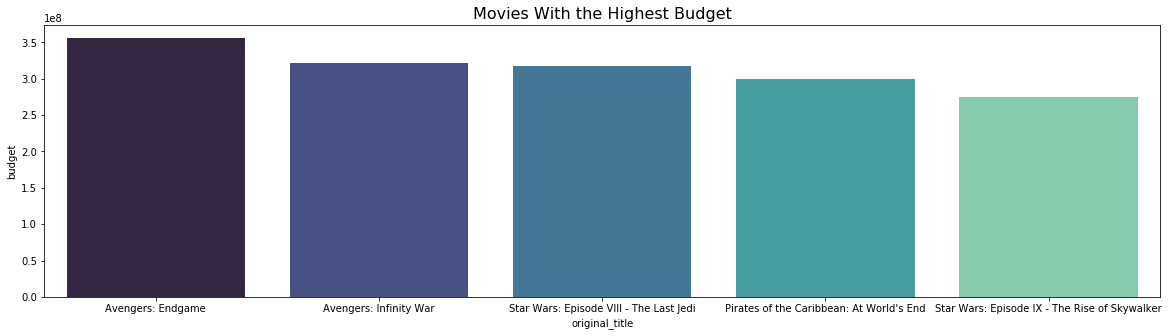

In [56]:
top_budget = df.nlargest(5,'budget')
plt.figure(figsize=(20, 5))
budget = sns.barplot(x='original_title', y='budget', data=top_budget,palette="mako")
budget.set_title('Movies With the Highest Budget', fontdict={'fontsize':16});

### 6.2 Drop null values from the budget and worldwide_gross_income columns

In [57]:
# Dropping NaN values from the budget and worlwide_gross_income columns
df.dropna(subset=['budget','worlwide_gross_income'], inplace=True)  

In [58]:
# Checking the shape of the dataset after I have dropped the NaN values
df.shape

(7705, 15)

In [59]:
# Dropping budget values that are equal to 0
df = df[df['budget'] != 0]

In [60]:
# Checking the shape of the dataset after I have dropped the 0 values
df.shape

(4670, 15)

### 6.3 Create a profit column

In [61]:
# Create column profit. Profit will be worlwide_gross_income minus budget
df['profit'] = (df['worlwide_gross_income'] - df['budget'])

In [62]:
df.head()

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit
imdb_id,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance,28019048.0
tt0097176,Deceit,1990,"Comedy,Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,"Comedy,Sci-Fi",Comedy,Sci-Fi,None,-25000.0
tt0098375,Spontaneous Combustion,1990,"Horror,Sci-Fi,Thriller",97,USA,Black Owl Productions,4.8,5500000.0,50367,50367.0,NaN,"Horror,Sci-Fi,Thriller",Horror,Sci-Fi,Thriller,-5449633.0
tt0098987,The Adventures of Ford Fairlane,1990,"Action,Adventure,Comedy",104,USA,Twentieth Century Fox,6.5,20000000.0,21413502,21413502.0,24.0,"Action,Adventure,Comedy",Action,Adventure,Comedy,1413502.0
tt0099005,Air America,1990,"Action,Comedy,War",113,USA,Carolco Pictures,5.8,35000000.0,31053601,33461269.0,33.0,"Action,Comedy,War",Action,Comedy,War,-1538731.0


<strong>IMPORTANT:</strong> Studios only take 60% of the sales tickets revenue. Thus, I am removing 40% of each value under the world_gross_income column.

In [63]:
# This lambda function takes each value under the column 'profit' and multiplies it by 0.6.
df['profit'] = df['profit'].apply(lambda x : x*0.6 if x > 0 else x)

In [64]:
# Making sure that the worlwide_gross_income and profit columns are integers
df.worlwide_gross_income.astype(int)
df.profit.astype(int).head()

imdb_id
tt0035423    16811428
tt0097176      -25000
tt0098375    -5449633
tt0098987      848101
tt0099005    -1538731
Name: profit, dtype: int64

In [65]:
# Movies with the highest profits
df.nlargest(5, 'profit')

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit
imdb_id,,,,,,,,,,,,,,,,
tt0499549,Avatar,2009,"Action,Adventure,Fantasy",162,USA,Twentieth Century Fox,7.8,237000000.0,760507625,2.790439e+09,83.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy,1.532063e+09
tt4154796,Avengers: Endgame,2019,"Action,Adventure,Drama",181,USA,Marvel Studios,8.4,356000000.0,858373000,2.797801e+09,78.0,"Action,Adventure,Sci-Fi",Action,Adventure,Drama,1.465080e+09
tt2488496,Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Sci-Fi",138,USA,Lucasfilm,7.9,245000000.0,936662225,2.068224e+09,80.0,"Action,Adventure,Fantasy",Action,Adventure,Sci-Fi,1.093934e+09
tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",149,USA,Marvel Studios,8.4,321000000.0,678815482,2.048360e+09,68.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1.036416e+09
tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",124,USA,Universal Pictures,7.0,150000000.0,652270625,1.670401e+09,59.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,9.122409e+08


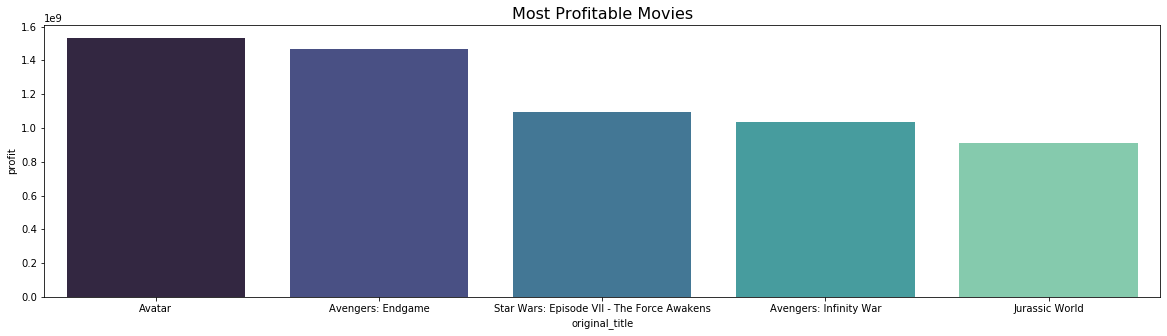

In [66]:
top_profits = df.nlargest(5,'profit')
plt.figure(figsize=(20, 5))
top_profits = sns.barplot(x='original_title', y='profit', data=top_profits,palette="mako")
top_profits.set_title('Most Profitable Movies', fontdict={'fontsize':16});

In [67]:
# Creates a dictionary with the top 5 movies with the highest budget
df_top_profit = df.filter(['original_title','profit'], axis=1)
df_top_profit.set_index('original_title',inplace=True)
profit_dict = dict(df_top_profit.nlargest(10, 'profit')['profit'])
profit_dict

{'Avatar': 1532063455.2,
 'Avengers: Endgame': 1465080338.3999999,
 'Star Wars: Episode VII - The Force Awakens': 1093934421.6,
 'Avengers: Infinity War': 1036415852.4,
 'Jurassic World': 912240866.4,
 'Frozen II': 780016159.8,
 'The Avengers': 779288523.6,
 'Jurassic World: Fallen Kingdom': 697174895.4,
 'Avengers: Age of Ultron': 691685251.8,
 'Black Panther': 688368502.8}

### 6.4 Correlatalion between budget and higher profits

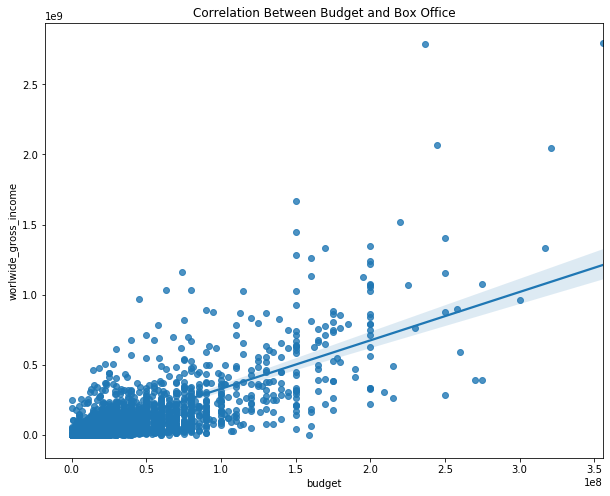

In [68]:
# Using a scatter plot to see the relation between budget and profits
plt.figure(figsize=(10, 8))
ax = sns.regplot(x="budget", y="worlwide_gross_income",data=df)
ax.set_title('Correlation Between Budget and Box Office', fontdict={'fontsize':12});

In [69]:
# Analysing the correlation between budget and profits
budget_revenue_corr = df.budget.corr(df.worlwide_gross_income)
budget_revenue_corr

0.7720767188901728

<strong>Takeaways:</strong> We can say that a higher budget has a strong positive correlation with higher profits.

# 7. Other Correlations

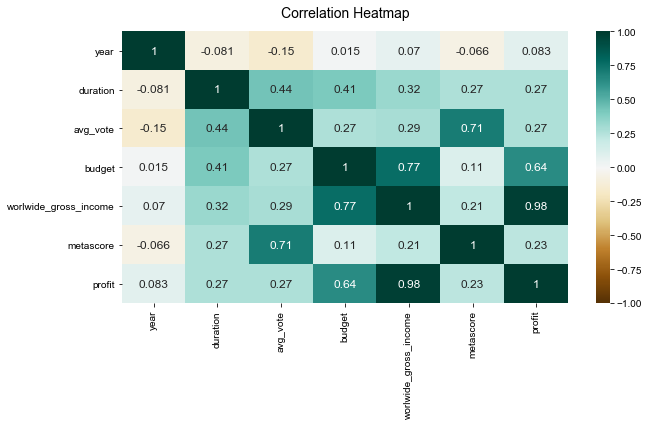

In [70]:
# Increase the size of the heatmap
plt.figure(figsize=(10, 5))
# Store the heatmap variable to use easily when applying other features
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={"size": 12})
# This fixes a randoring problem on the top and bottom of the heatmap
plt.ylim([7,0])
plt.style.use('seaborn')
# Adding a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);

<strong>Takeaways:</strong> 

- Higher budget and higher profits have a moderate correlation
- Budget and box office have a strong correlation
- Duration and average vote have a moderate correlation
- Budget and duration have a moderate correlation

# 8. Most Profitable Genres Group

- Find the most profitable individual genre and group of genres - net and per dollar invested

Note: The profit column values represent the  subtraction of the values in the worlwide_gross_income column by the values under the budget column minus 40%, which is the the revenue margin destinated to movie theaters.

### 8.1 Make a copy of the main DataFrame

In [71]:
# Checking DataFrame columns
df.columns

Index(['original_title', 'year', 'genre', 'duration', 'country',
       'production_company', 'avg_vote', 'budget', 'usa_gross_income',
       'worlwide_gross_income', 'metascore', 'genres', 'genre_1', 'genre_2',
       'genre_3', 'profit'],
      dtype='object')

In [72]:
# Dropping extra genres columns
df.drop(columns=['genres', 'genre_1', 'genre_2','genre_3'], inplace=True)

In [73]:
# Making a copy of the the main DataFrame in case something goes wrong
df_genre_mean = df.copy()

In [74]:
# Checking if the copy was successful
df_genre_mean.head(2)

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,profit
imdb_id,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,16811428.8
tt0097176,Deceit,1990,"Comedy,Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,-25000.0


### 8.2 Create a new data frame

A new DataFrame will be used to easily access the mean values for the genres groups. The new DataFrame will have values divided by 1,000,000. The objective is to make the readness easy to be done.

In [75]:
# This code allows pandas to show all the rows
pd.set_option('display.max_rows', None)
# Group data by genre and get mean for each genre and each variable, divide by 1 million for better visibility
df_genre_mean = df_genre_mean.groupby(['genre']).mean()
df_genre_mean ['profit_million'] = df_genre_mean['profit']/1000000
df_genre_mean['return_per_dollar'] = df_genre_mean['profit']/df_genre_mean['budget']
# Delete the 'profit' column
del df_genre_mean['profit']
df_genre_mean['worlwide_gross_income'] = df_genre_mean['worlwide_gross_income']/1000000
# Delete the 'worlwide_gross_income' column
del df_genre_mean['worlwide_gross_income']
df_genre_mean['budget_million'] = df_genre_mean['budget']/1000000
# Delete the 'budget' column
del df_genre_mean['budget']
# Delete the 'year' column
del df_genre_mean['year']

In [76]:
# Checking if the new DataFrame is working properly
df_genre_mean.head()

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Action,97.857143,4.228571,24.000000,-4.171788,-0.750707,5.557143
"Action,Adventure",97.666667,4.433333,65.000000,118.384272,1.707465,69.333333
"Action,Adventure,Comedy",103.150000,5.855000,49.862745,78.514869,1.167884,67.228334
"Action,Adventure,Crime",101.941176,5.423529,42.181818,5.893621,0.146715,40.170588
"Action,Adventure,Drama",112.916667,5.944444,56.541667,68.043480,1.197802,56.806944


### 8.3 Most profitable group of genres (net)

In [77]:
# Sorting values by the profit_million column. It's in descending order.
df_genre_mean.sort_values(by=['profit_million'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
"Family,Fantasy,Musical",129.000000,7.100000,65.000000,662.438628,4.140241,160.000000
"Adventure,Sci-Fi,Thriller",116.000000,6.500000,73.000000,283.123871,2.144878,132.000000
"Adventure,Drama,Fantasy",117.333333,5.900000,57.166667,267.599567,3.824672,69.966667
"Action,Adventure,Sci-Fi",125.647059,6.532353,54.833333,259.682800,1.842587,140.933824
"Action,Drama,Music",129.000000,6.300000,39.000000,231.604044,9.264162,25.000000
"Action,Adventure,Fantasy",118.354839,5.961290,47.407407,221.116653,2.052372,107.737097
"Biography,Drama,Musical",105.000000,7.600000,48.000000,210.651842,2.507760,84.000000
"Animation,Adventure,Drama",89.000000,7.320000,64.600000,179.468718,2.991145,60.000000
"Animation,Adventure,Comedy",90.781250,6.580208,61.274725,176.035318,1.776850,99.071562


In [78]:
# Dictionary with the group of genres with the highest profits
dict(df_genre_mean.nlargest(5,'profit_million'))['profit_million']

genre
Family,Fantasy,Musical       662.438628
Adventure,Sci-Fi,Thriller    283.123871
Adventure,Drama,Fantasy      267.599567
Action,Adventure,Sci-Fi      259.682800
Action,Drama,Music           231.604044
Name: profit_million, dtype: float64

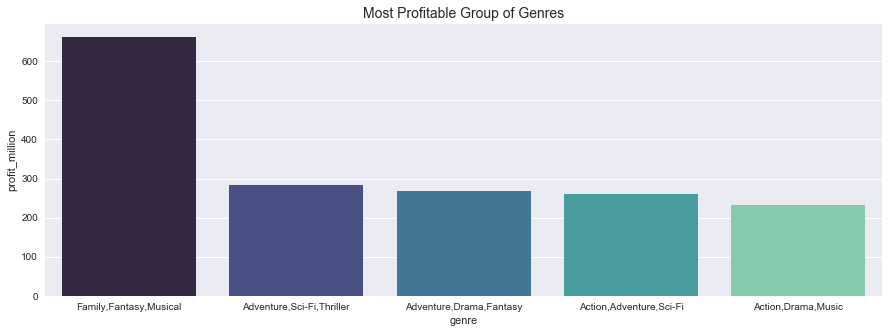

In [79]:
genre_group_net = df_genre_mean.nlargest(5,'profit_million')
plt.figure(figsize=(15, 5))
genre_group_net = sns.barplot(x='genre', y='profit_million', data=genre_group_net.reset_index(),palette="mako")
genre_group_net.set_title('Most Profitable Group of Genres', fontdict={'fontsize':14});

### 8.4 Return per dollar invested

In [80]:
# Sorting values by the return_per_dollar column. It's in descending order.
df_genre_mean.sort_values(by=['return_per_dollar'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
"Adventure,Drama,Horror",89.666667,5.833333,48.500000,10.834668,64.225864,0.168696
"Action,Comedy,Musical",76.000000,4.000000,NaN,0.014464,13.148727,0.001100
"Action,Drama,Music",129.000000,6.300000,39.000000,231.604044,9.264162,25.000000
"Biography,Comedy,Romance",87.000000,5.400000,36.000000,0.288982,4.816360,0.060000
"Family,Fantasy,Musical",129.000000,7.100000,65.000000,662.438628,4.140241,160.000000
"Adventure,Drama,Fantasy",117.333333,5.900000,57.166667,267.599567,3.824672,69.966667
"Drama,Horror,Sci-Fi",94.000000,5.940000,67.666667,40.848638,3.702741,11.032000
"Drama,Fantasy,Music",107.000000,6.700000,46.000000,40.364906,3.669537,11.000000
"Horror,Mystery,Sci-Fi",86.142857,4.957143,31.000000,5.978495,3.151917,1.896781


In [81]:
dict(df_genre_mean.nlargest(5,'return_per_dollar'))['return_per_dollar']

genre
Adventure,Drama,Horror      64.225864
Action,Comedy,Musical       13.148727
Action,Drama,Music           9.264162
Biography,Comedy,Romance     4.816360
Family,Fantasy,Musical       4.140241
Name: return_per_dollar, dtype: float64

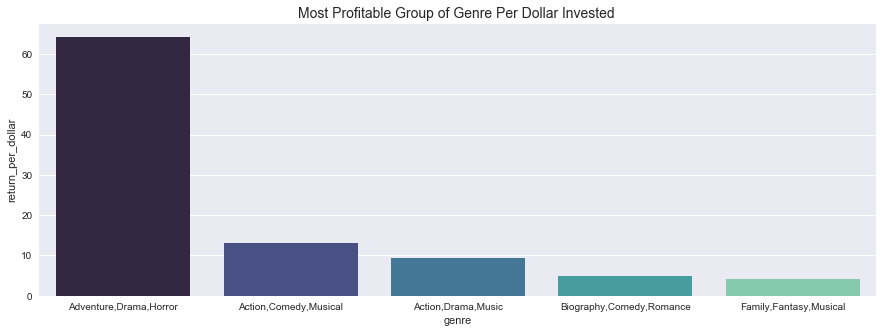

In [82]:
genre_group_roi = df_genre_mean.nlargest(5,'return_per_dollar')
plt.figure(figsize=(15, 5))
genre_group_roi = sns.barplot(x='genre', y='return_per_dollar', data=genre_group_roi.reset_index(),palette="mako")
genre_group_roi.set_title('Most Profitable Group of Genre Per Dollar Invested ', fontdict={'fontsize':14});

In [83]:
# Sorting values by the return_per_dollar column. It's in descending order.
df_genre_mean.sort_values(by=['return_per_dollar'],ascending=True).head(5)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
"Crime,Horror,Action",90.0,5.9,NaN,-4.000,-1.0,4.000
"Family,Sport",95.0,4.5,NaN,-2.000,-1.0,2.000
"Comedy,Musical,Thriller",95.0,7.1,NaN,-0.125,-1.0,0.125
"Family,Musical,Romance",89.0,2.9,NaN,-12.000,-1.0,12.000
"Action,Thriller,War",92.0,4.3,39.0,-3.000,-1.0,3.000


# 9. Most Profitable Individual Genres

In [84]:
# Make a copy of the main DataFrame
df_copy = df.copy()
df_copy.head()

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,profit
imdb_id,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,16811428.8
tt0097176,Deceit,1990,"Comedy,Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,-25000.0
tt0098375,Spontaneous Combustion,1990,"Horror,Sci-Fi,Thriller",97,USA,Black Owl Productions,4.8,5500000.0,50367,50367.0,NaN,-5449633.0
tt0098987,The Adventures of Ford Fairlane,1990,"Action,Adventure,Comedy",104,USA,Twentieth Century Fox,6.5,20000000.0,21413502,21413502.0,24.0,848101.2
tt0099005,Air America,1990,"Action,Comedy,War",113,USA,Carolco Pictures,5.8,35000000.0,31053601,33461269.0,33.0,-1538731.0


### 9.1 Split the genres and create a new DataFrame

In [85]:
# Split genres and create a new entry for each of the genre a movie falls into
s = df_copy['genre'].str.split(',').apply(Series, 1).stack()
# Create a temporary DataFrame with the index and genre columns
s.index = s.index.droplevel(-1)
s.name = 'genre'
# Delete the genre column
del df_copy['genre']
df_split_genres = df_copy.join(s)

In [86]:
# Check entries (should be a lot more rows since the most movies have more than one genre)
df_split_genres.shape

(11135, 12)

In [87]:
# This code allows pandas to show all the rows
pd.set_option('display.max_rows', None)
# Group data by genre and get mean for each genre and each variable, divide by 1 million for better visibility
df_per_genre = df_split_genres.groupby(['genre']).mean()
df_per_genre ['profit_million'] = df_per_genre['profit']/1000000
df_per_genre ['return_per_dollar'] = df_per_genre['profit']/df_per_genre['budget']
# Delete the 'profit' column
del df_per_genre['profit']
df_per_genre['worlwide_gross_income'] = df_per_genre['worlwide_gross_income']/1000000
# Delete the 'worlwide_gross_income' column
del df_per_genre['worlwide_gross_income']
df_per_genre['budget_million'] = df_per_genre['budget']/1000000
# Delete the 'budget' column
del df_per_genre['budget']
# Delete the 'year' column
del df_per_genre['year']

### 9.2 Most profitable individual genre

### 9.3 Most profitable individual genre

In [88]:
df_per_genre.sort_values(by=['profit_million'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Animation,89.460733,6.449215,60.675000,124.593940,1.563503,79.688986
Adventure,104.350090,6.094973,54.196468,109.981796,1.515157,72.587715
Sci-Fi,103.929487,5.573077,50.814433,67.812670,1.374940,49.320474
Action,104.897959,5.712782,48.173077,49.851745,1.080559,46.135139
Fantasy,102.236934,5.742509,47.270531,46.532762,1.270424,36.627749
Family,97.350000,5.640714,47.274611,29.530514,0.889378,33.203557
Musical,101.857143,5.705714,47.523810,23.973997,1.129804,21.219603
Comedy,97.919162,5.826697,48.994456,22.289033,0.928640,24.001809
Mystery,102.008065,5.845699,50.000000,16.573615,0.878012,18.876286


In [89]:
dict(df_per_genre.nlargest(5,'profit_million'))['profit_million']

genre
Animation    124.593940
Adventure    109.981796
Sci-Fi        67.812670
Action        49.851745
Fantasy       46.532762
Name: profit_million, dtype: float64

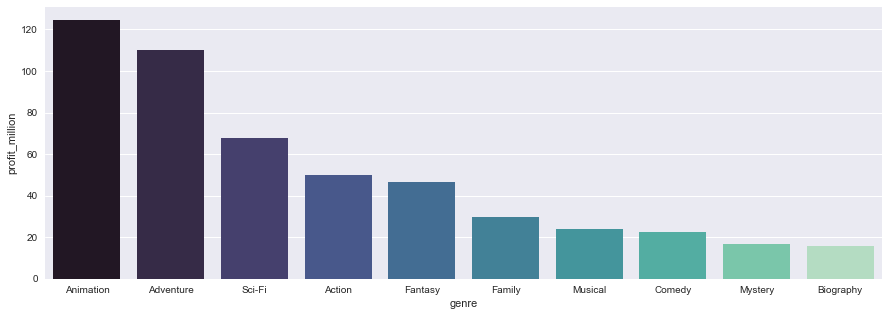

In [90]:
genre_roi = df_per_genre.nlargest(10,'profit_million')
plt.figure(figsize=(15, 5))
genre_roi = sns.barplot(x='genre', y='profit_million', data=genre_roi.reset_index(),palette="mako")
genre_roi = genre_group_roi.set_title('Most Profitable Group of Genre Per Dollar Invested ', fontdict={'fontsize':14});

### 9.4 Return per dollar invested

In [91]:
# Sorting the value by the 'return_per_dollar'
df_per_genre.sort_values(by=['return_per_dollar'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Animation,89.460733,6.449215,60.675000,124.593940,1.563503,79.688986
Adventure,104.350090,6.094973,54.196468,109.981796,1.515157,72.587715
Sci-Fi,103.929487,5.573077,50.814433,67.812670,1.374940,49.320474
Fantasy,102.236934,5.742509,47.270531,46.532762,1.270424,36.627749
Musical,101.857143,5.705714,47.523810,23.973997,1.129804,21.219603
Action,104.897959,5.712782,48.173077,49.851745,1.080559,46.135139
Horror,92.687296,4.922313,44.268382,8.024898,0.970661,8.267455
Comedy,97.919162,5.826697,48.994456,22.289033,0.928640,24.001809
Family,97.350000,5.640714,47.274611,29.530514,0.889378,33.203557


In [92]:
dict(df_per_genre.nlargest(5,'return_per_dollar'))['return_per_dollar']

genre
Animation    1.563503
Adventure    1.515157
Sci-Fi       1.374940
Fantasy      1.270424
Musical      1.129804
Name: return_per_dollar, dtype: float64

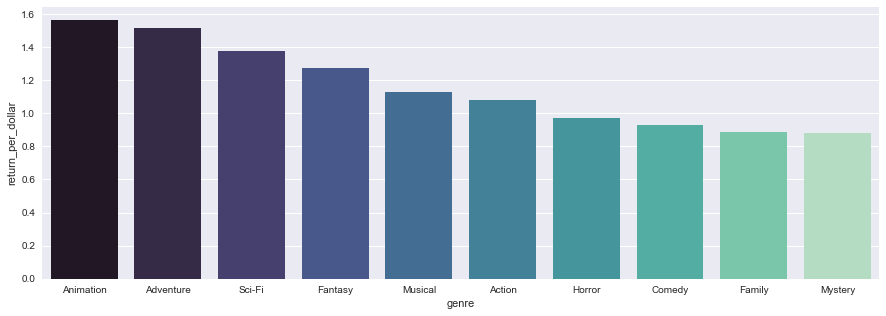

In [93]:
genre_roi = df_per_genre.nlargest(10,'return_per_dollar')
plt.figure(figsize=(15, 5))
genre_roi = sns.barplot(x='genre', y='return_per_dollar', data=genre_roi.reset_index(),palette="mako")
genre_roi = genre_group_roi.set_title('Most Profitable Group of Genre Per Dollar Invested ', fontdict={'fontsize':14});

In [94]:
# Sorting the value by the 'return_per_dollar' 
df_per_genre.sort_values(by=['return_per_dollar'],ascending=True).head(5)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
War,116.523810,6.116667,52.741935,-1.468565,-0.075047,19.568571
History,128.348485,6.566667,54.981481,7.711596,0.215266,35.823629
Sport,108.560606,6.191667,50.636364,8.969042,0.409204,21.918266
Crime,103.997732,6.012245,50.984483,8.848316,0.416412,21.248927
Western,105.804878,5.712195,56.650000,8.734006,0.505994,17.261074


In [95]:
dict(df_per_genre.nsmallest(5,'return_per_dollar'))['return_per_dollar']

genre
War       -0.075047
History    0.215266
Sport      0.409204
Crime      0.416412
Western    0.505994
Name: return_per_dollar, dtype: float64

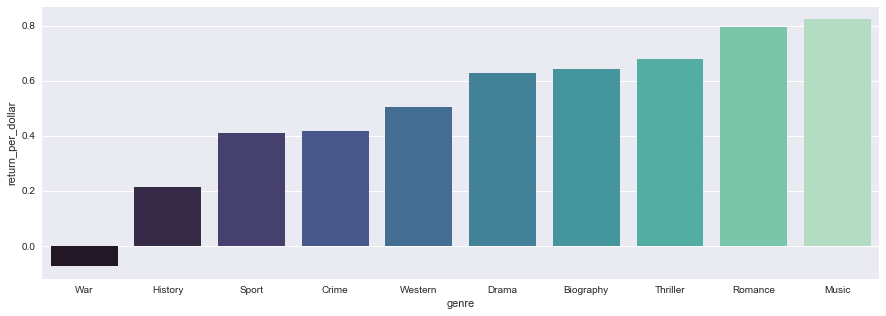

In [96]:
genre_roi = df_per_genre.nsmallest(10,'return_per_dollar')
plt.figure(figsize=(15, 5))
sns.barplot(x='genre', y='return_per_dollar', data=genre_roi.reset_index(),palette="mako")


# 10. Final Takeaways and Recomendations

#### Out of the top 20 most profitable movies:
   - 19 them are part of a franchise of movies
   - 13 of them are continuations of previous movies
   - 5 of them are the first movie of a franchise
   - 2 of them haven't had a continuation yet, but they are underway
   - Only Beauty and the Best isn't part of a franchise yet.
    
    
#### Correlation between the data:
   - Higher budget and higher box office are positively correlated. However, it is not garantee that higher budget will bring higher revenue. It will depend on the quality and reception of the final product

   - Higher budget and higher profits have a positive moderate correlation

   - Budget and box office have a strong positive correlation

   - Duration and average vote have a moderate correlation

   - Budget and duration have a moderate correlation




#### The genres with more movies launched between 1990 and 2020 are:
   - Drama, Comedy, Horror, Thriller, Action, Biography, Adventure, Romance, and Crime.


#### The groups of genres that are doing the highest in box office reveue are:
    - Family,Fantasy,Musical       662.438628 million dollars 
    - Adventure,Sci-Fi,Thriller    283.123871 million dollars
    - Adventure,Drama,Fantasy      267.599567 million dollars
    - Action,Adventure,Sci-Fi      259.682800 million dollars
    - Action,Drama,Music           231.604044 million dollars
    
#### The group of genres that bring the highest ROI (per dollar invested) are:    
    
    - Adventure,Drama,Horror      64.225864 per dollar invested 
    - Action,Comedy,Musical       13.148727 per dollar invested
    - Action,Drama,Music           9.264162 per dollar invested
    - Biography,Comedy,Romance     4.816360 per dollar invested
    - Family,Fantasy,Musical       4.140241 per dollar invested

#### The individual genres that bring the highest in box office reveue are:
    - Animation    124.593940
    - Adventure    109.981796
    - Sci-Fi        67.812670
    - Action        49.851745
    - Fantasy       46.532762

#### The individual genre that bring the highest ROI per dolar invested are
    - Animation    1.563503
    - Adventure    1.515157
    - Sci-Fi       1.374940
    - Fantasy      1.270424
    - Musical      1.129804
    
#### The individual genre that bring the lowest ROI per dolar invested are    
    - War       -0.075047
    - History    0.215266
    - Sport      0.409204
    - Crime      0.416412
    - Western    0.505994